In [1]:
"""
Regression with Auto-MPG data -- UCI dataset -- 398 data rows
https://archive.ics.uci.edu/ml/datasets/auto+mpg
The dataset is mentioned to have missing values
Original 398 rows; 6 rows with missing values
"""

'\nRegression with Auto-MPG data -- UCI dataset -- 398 data rows\nhttps://archive.ics.uci.edu/ml/datasets/auto+mpg\nThe dataset is mentioned to have missing values\nOriginal 398 rows; 6 rows with missing values\n'

In [1]:
def read_file_auto(filename):
    line_count = 0
    file_read = open(filename,"r")
    file_write = open("fixed-auto-mpg.csv","w")
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if "?" in line_split:
            line_count += 1
            print("Bad line number:",line_count)
            continue  
        else:
            line_count += 1
            file_write.write(line)
    file_read.close()
    file_write.close()
    return

In [2]:
read_file_auto("auto-mpg.csv")

Bad line number: 34
Bad line number: 128
Bad line number: 332
Bad line number: 338
Bad line number: 356
Bad line number: 376


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('fixed-auto-mpg.csv') # deleted 6 rows with ? unknown data
print("Dataframe shape: ",df.shape,"\n") # 392 rows + header
print(df.head())

Dataframe shape:  (392, 9) 

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
df = df.drop("origin",axis=1)
df = df.drop("name",axis=1)

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
print(df[0:5])

    mpg  cylinders  displacement  horsepower  weight  acceleration  year
0  18.0          8         307.0         130    3504          12.0    70
1  15.0          8         350.0         165    3693          11.5    70
2  18.0          8         318.0         150    3436          11.0    70
3  16.0          8         304.0         150    3433          12.0    70
4  17.0          8         302.0         140    3449          10.5    70


In [8]:
print(df[-5:])

      mpg  cylinders  displacement  horsepower  weight  acceleration  year
387  27.0          4         140.0          86    2790          15.6    82
388  44.0          4          97.0          52    2130          24.6    82
389  32.0          4         135.0          84    2295          11.6    82
390  28.0          4         120.0          79    2625          18.6    82
391  31.0          4         119.0          82    2720          19.4    82


In [9]:
# Normalizing dfpr
from sklearn import preprocessing
float_array = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler() # alias
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array,columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","year"])
print("Dataframe shape: ",df_normalized.shape,"\n") # 392 rows, 7 columns + header

Dataframe shape:  (392, 7) 



In [10]:
print(df_normalized[0:5])
# print(df_normalized[-5:])

        mpg  cylinders  displacement  horsepower    weight  acceleration  year
0  0.239362        1.0      0.617571    0.456522  0.536150      0.238095   0.0
1  0.159574        1.0      0.728682    0.646739  0.589736      0.208333   0.0
2  0.239362        1.0      0.645995    0.565217  0.516870      0.178571   0.0
3  0.186170        1.0      0.609819    0.565217  0.516019      0.238095   0.0
4  0.212766        1.0      0.604651    0.510870  0.520556      0.148810   0.0


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013493B8C780>,
      dtype=object)

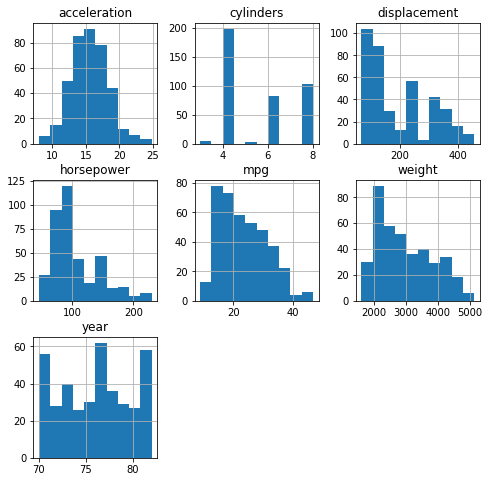

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013494453630>,
      dtype=object)

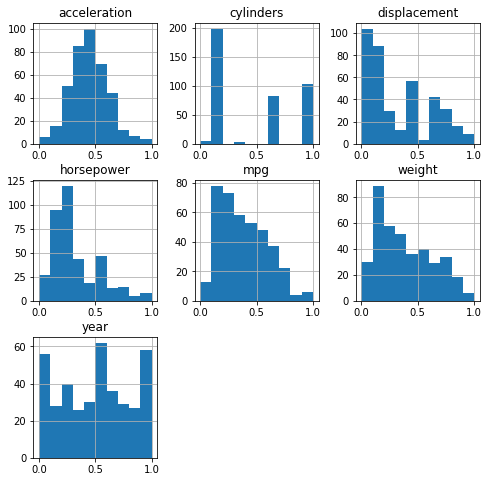

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df_normalized.hist(ax = ax)

In [13]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    labels = ["m","mpg","cylinders","displacement","horsepower","weight","acceleration","year"]
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [14]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


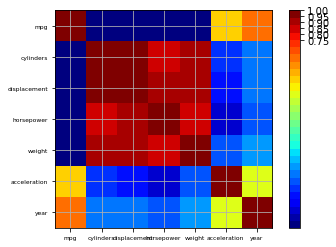

In [15]:
correlation_matrix(df) # original data

In [16]:
df_normalized.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


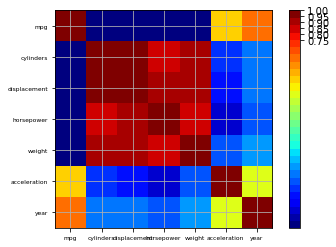

In [17]:
correlation_matrix(df_normalized) # normalized data

In [18]:
X = df_normalized.drop('mpg',axis=1)
y = df_normalized['mpg']

In [19]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
# print(y_train)

X_train shape:  (294, 6)
y_train shape:  (294,)
X_test shape:  (98, 6)
y_test shape:  (98,)


In [20]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [21]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   0.09645213278153623
Ridge   0.09658071800222981
Lasso   0.22473205510307503
LassoLars   0.22473205510307503
BayesianRidge   0.09622827500001642


In [22]:
# Training model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

0.45996395906774845
[-0.0012727   0.02855689  0.00597503 -0.62086694  0.06906028  0.23813814]
Number of coefficients is  6


In [23]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.09622827500001642


In [24]:
# Try to make predictions on unknown data
# Put mpg = 20 as dummy value
# Cylinders – 4
# Displacement – 121
# Horsepower – 110
# Weight – 2800
# Acceleration – 15.4
# Year – 81

In [25]:
first_test = np.array([[20,4,121,110,2800,15.4,81]])
print("Starting predict request:",first_test)

Starting predict request: [[  20.     4.   121.   110.  2800.    15.4   81. ]]


In [26]:
first_test_transform = min_max_scaler.transform(first_test) # apply the same transform
print("Normalized new test row :",first_test_transform)

Normalized new test row : [[0.29255319 0.2        0.1369509  0.34782609 0.33654664 0.44047619
  0.91666667]]


In [27]:
test_1 = list(first_test_transform[0][1:7]) # Extract all values excluding mpg
test_seq = [test_1] # make a list of list

In [28]:
test_result = lm.predict(test_seq) # apply model prediction
print("Test result MPG (still normalized): ",test_result[0]) # this is still normalized mpg result

Test result MPG (still normalized):  0.5054606033235596


In [29]:
first_test_transform[0][0] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",first_test_transform)

Test row with predicted (still normalized):  [[0.5054606  0.2        0.1369509  0.34782609 0.33654664 0.44047619
  0.91666667]]


In [30]:
result = min_max_scaler.inverse_transform(first_test_transform) # apply inverse transform
print("Final test result: ",result)
print("Predicted MPG: ",result[0][0])

Final test result:  [[  28.00531868    4.          121.          110.         2800.
    15.4          81.        ]]
Predicted MPG:  28.005318684965843


In [25]:
# Above test is Saab and actual MPG is 26

# Regression HW) Car pricing dataset
# Perform a similar Data Exploration followed by regression analysis and predictions
# Drop/keep appropriate columns

In [29]:
# https://archive.ics.uci.edu/ml/datasets/Automobile

# Create regression model for price of the car

In [128]:
# import csv to dataframe
import pandas as pd

df = pd.read_csv('imports-85.data')

In [129]:
df.describe()


,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [130]:
# needs column headers
column_names = ['symboling','normalized-loses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = column_names
df.head()

,symboling,normalized-loses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [131]:
# locate and address missing data
# find and drop all ?
# normalized-loses, 

df=df[~df['normalized-loses'].str.contains('?', regex=False)]
df=df[~df['num-of-doors'].str.contains('?', regex=False)]
df=df[~df['price'].str.contains('?', regex=False)]
df=df[~df['bore'].str.contains('?', regex=False)]
df=df[~df['stroke'].str.contains('?', regex=False)]
df=df[~df['horsepower'].str.contains('?', regex=False)]
df=df[~df['peak-rpm'].str.contains('?', regex=False)]
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,26.522013,32.081761
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,6.097142,6.459189
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,23.000000,28.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,26.000000,32.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,31.000000,37.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


In [132]:
# create dummy variables

In [133]:
# create dummy data
df = pd.get_dummies(df, columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'])

In [143]:
dummified_list = list(df.columns.values)
# we now have 65 columns


In [149]:
#reindex after dropped rows, or we won't be able to normalize
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-loses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,1,0,0,0,0,0,0,1,0
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,0,0,0,0,0,0,0,1,0
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,1,0,0,0,0,0,0,0,1,0
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,1,0,0,0,0,0,0,0,1,0
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,...,0,1,0,0,0,0,0,0,1,0


In [151]:
# normalize variables
# Normalizing dfpr
from sklearn import preprocessing
float_array = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler() # alias
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array,columns = [dummified_list])
print("Dataframe shape: ",df_normalized.shape,"\n") # 392 rows, 7 columns + header

Dataframe shape:  (159, 65) 



In [152]:
df_normalized.head()

,symboling,normalized-loses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,0.8,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.243655,0.464286,0.633333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.8,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.380711,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.380711,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.6,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.355330,0.421429,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.8,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.238579,0.685714,0.347619,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
# see correlation matrix
df_normalized.corr()

,symboling,normalized-loses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,...,-0.106998,0.013899,-0.005634,0.084561,-0.022805,0.039371,-0.163505,0.151452,0.031332,0.040020
normalized-loses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,...,0.003516,-0.244995,0.288623,-0.000296,-0.129331,-0.142310,-0.110178,0.053429,0.233676,0.090593
wheel-base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,...,0.389531,-0.364894,0.220615,-0.152345,-0.229049,-0.459666,0.339752,-0.036513,0.419498,-0.109983
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,...,0.338955,-0.383195,0.275542,-0.216873,-0.325910,-0.483221,0.230757,0.005445,0.545299,-0.093080
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,...,0.513866,-0.513139,0.269691,-0.217457,-0.202728,-0.526301,0.312339,0.028371,0.467067,-0.078649
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,...,0.203390,-0.019879,-0.085293,-0.024601,-0.064580,-0.147031,0.245546,-0.130131,0.141426,-0.243746
curb-weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,...,0.386450,-0.578496,0.426738,-0.161147,-0.235887,-0.567896,0.287617,0.057935,0.530560,-0.064262
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,...,0.303305,-0.701183,0.609479,-0.152553,-0.196291,-0.502771,0.190333,0.096347,0.503662,-0.083234
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,...,0.083877,-0.102459,0.085637,-0.116463,-0.308891,-0.321252,0.061210,0.089521,0.474115,-0.125847
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,...,0.219586,-0.179062,0.089174,-0.055846,0.189711,-0.241469,0.270438,0.179607,-0.090158,0.119926


In [161]:
# split data and build a model
# build X and y
X = df_normalized.drop('price',axis=1)
y = df_normalized['price']

In [162]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
# print(y_train)

X_train shape:  (119, 64)
y_train shape:  (119, 1)
X_test shape:  (40, 64)
y_test shape:  (40, 1)


In [163]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [166]:
# train and compare mean square error
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   0.06322304611528877
Ridge   0.05655842074715008
Lasso   0.1935829019740044
LassoLars   0.1935829019740044
BayesianRidge   0.056629428450026616


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# linear regression is good, but ridge is the best
# Ridge   0.05655842074715008
# values that correlated strongly were related to the size of the vehicle
# strong correlation between price and wheelbase, length, height, crub-weight, engine-size